In [2]:
from datadreamer import DataDreamer
from datadreamer.llms import OpenAI
from datadreamer.steps import DataFromPrompt, Embed, CosineSimilarity, concat
from datadreamer.embedders import SentenceTransformersEmbedder
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [4]:
os.environ["OPENAI_API_KEY"] = input("Enter OpenAI API Key")

In [3]:
with DataDreamer("./output"):
    gpt_4 = OpenAI(
        model_name="gpt-4",
        organization="org-bgAXfs8WdU5942SLngg0OGpd"
    )

    pos_data = DataFromPrompt(
        "Generate Data with Positive Style",
        args={
            "llm": gpt_4,
            "n": 100,
            "temperature": 1.2,
            "instruction": (
                "Generate a sentence where words with positive affect are frequently used. Respond with only the sentence."
            ),
        },
        outputs={"generations": "sentences"},
    )
    neg_data = DataFromPrompt(
        "Generate Data with Negative Style",
        args={
            "llm": gpt_4,
            "n": 100,
            "temperature": 1.2,
            "instruction": (
                "Generate a sentence where words with negative affect are frequently used. Respond with only the sentence."
            ),
        },
        outputs={"generations": "sentences"},
    )


[ 🤖 DataDreamer 💤 ] Initialized. 🚀 Dreaming to folder: ./output
[ 🤖 DataDreamer 💤 ] Step 'Generate Data with Positive Style' results loaded from disk. 🙌 It was previously run and saved.
[ 🤖 DataDreamer 💤 ] Step 'Generate Data with Negative Style' was previously run and saved, but was outdated. 😞
[ 🤖 DataDreamer 💤 ] Step 'Generate Data with Negative Style' is running. ⏳


'NoneType' object has no attribute 'cadam32bit_grad_fp32'


[ 🤖 DataDreamer 💤 ] Step 'Generate Data with Negative Style' finished and is saved to disk. 🎉
[ 🤖 DataDreamer 💤 ] Done. ✨ Results in folder: ./output


In [32]:
with DataDreamer("./output"):
    pos_embed = Embed(
        name = "Positive Data Embeddings",
        inputs = {
            "texts": pos_data.output["sentences"]
        },
        args = {
            "embedder": SentenceTransformersEmbedder(
                model_name="AnnaWegmann/Style-Embedding"
            )
        },
        outputs = {
            "texts": "sentences",
            "embeddings": "embeddings"
        },
    )
    neg_embed = Embed(
        name = "Negative Data Embeddings",
        inputs = {
            "texts": neg_data.output["sentences"]
        },
        args = {
            "embedder": SentenceTransformersEmbedder(
                model_name="AnnaWegmann/Style-Embedding"
            )
        },
        outputs = {
            "texts": "sentences",
            "embeddings": "embeddings"
        },
    )
    '''
    cos_sim = CosineSimilarity(
		name = "Cosine Similarities",
		inputs = {
			"a": pos_data.output["sentences"],
			"b": neg_data.output["sentences"]
		},
		args = {
			"embedder": SentenceTransformersEmbedder(
                model_name="AnnaWegmann/Style-Embedding"
            )
		},
		outputs = {
			"a": "pos_sentences",
			"b": "neg_sentences",
			"similarities": "cos_sim"
		},
	)
    '''

[ 🤖 DataDreamer 💤 ] Initialized. 🚀 Dreaming to folder: ./output
[ 🤖 DataDreamer 💤 ] Step 'Positive Data Embeddings' was previously run and the results were backed up. 💾
[ 🤖 DataDreamer 💤 ] Step 'Positive Data Embeddings' results loaded from disk. 🙌 It was previously run and saved.
[ 🤖 DataDreamer 💤 ] Step 'Negative Data Embeddings' results loaded from disk. 🙌 It was previously run and saved.
[ 🤖 DataDreamer 💤 ] Done. ✨ Results in folder: ./output


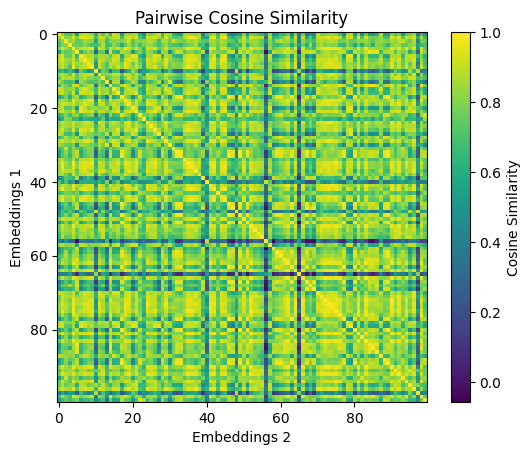

In [12]:
pos_embed_lst = [pos_embed.output["embeddings"][i] for i in range(pos_embed.output.num_rows)]
neg_embed_lst = [neg_embed.output["embeddings"][i] for i in range(neg_embed.output.num_rows)]
all_embed_lst = np.array(pos_embed_lst + neg_embed_lst)

embed_lst_1 = pos_embed_lst
embed_lst_2 = pos_embed_lst

cosine_similarities = cosine_similarity(embed_lst_1, embed_lst_2)
plt.imshow(cosine_similarities, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title('Pairwise Cosine Similarity')
plt.xlabel('Embeddings 2')
plt.ylabel('Embeddings 1')
# plt.xticks(ticks=np.arange(len(embed_lst_1)), labels=np.arange(1, len(embed_lst_1)+1))
# plt.yticks(ticks=np.arange(len(embed_lst_2)), labels=np.arange(1, len(embed_lst_2)+1))
plt.show()
np.fill_diagonal(cosine_similarities, np.nan)
avg_cos_sim_both_pos = np.nanmean(cosine_similarities)

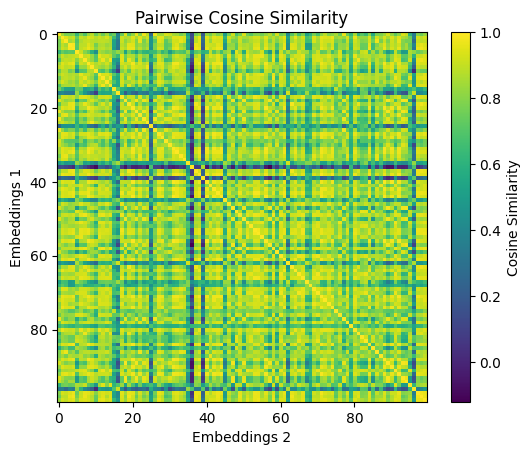

In [21]:
embed_lst_1 = neg_embed_lst
embed_lst_2 = neg_embed_lst

cosine_similarities = cosine_similarity(embed_lst_1, embed_lst_2)
plt.imshow(cosine_similarities, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title('Pairwise Cosine Similarity')
plt.xlabel('Embeddings 2')
plt.ylabel('Embeddings 1')
# plt.xticks(ticks=np.arange(len(embed_lst_1)), labels=np.arange(1, len(embed_lst_1)+1))
# plt.yticks(ticks=np.arange(len(embed_lst_2)), labels=np.arange(1, len(embed_lst_2)+1))
plt.show()
np.fill_diagonal(cosine_similarities, np.nan)
avg_cos_sim_both_neg = np.nanmean(cosine_similarities)

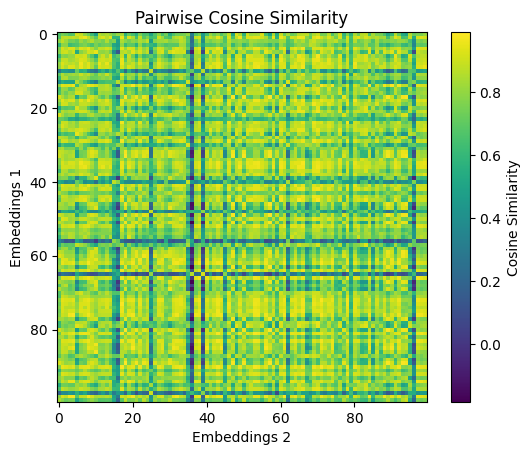

In [22]:
embed_lst_1 = pos_embed_lst
embed_lst_2 = neg_embed_lst

cosine_similarities = cosine_similarity(embed_lst_1, embed_lst_2)
plt.imshow(cosine_similarities, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title('Pairwise Cosine Similarity')
plt.xlabel('Embeddings 2')
plt.ylabel('Embeddings 1')
# plt.xticks(ticks=np.arange(len(embed_lst_1)), labels=np.arange(1, len(embed_lst_1)+1))
# plt.yticks(ticks=np.arange(len(embed_lst_2)), labels=np.arange(1, len(embed_lst_2)+1))
plt.show()
np.fill_diagonal(cosine_similarities, np.nan)
avg_cos_sim_pos_neg = np.nanmean(cosine_similarities)

In [23]:
print(avg_cos_sim_both_pos)
print(avg_cos_sim_both_neg)
print(avg_cos_sim_pos_neg)

0.7543530582582771
0.7644516008622265
0.7433274069292124


In [29]:
for i in range(5):
    print(pos_data.output["sentences"][i])

Surely, amidst inspiring opportunities filled with breathtaking optimism, our brilliant hearts overflow with joy, vitality, and abundant love.
The joyful child felt pure bliss as he encountered the extraordinary beauty of life, discovering inspiring grace and profound love in everything he explored.
Warm smiles, joyful laughter, and genuine love filled the room, driving an atmosphere of radiant happiness and comfort which effortlessly stirred delightful feelings inside everyone's heart.
Delightful moments of blissful joy and boundless happiness constantly illuminate our vibrant journey, creating love-filled experiences of genuine warmth and inexhaustible positivity.
Experiencing boundless joy, she danced radiantly beneath the enchanting sapphire sky, her heart bursting with pure bliss and boundless love for the spectacular beauty surrounding her.


In [30]:
for i in range(5):
    print(neg_data.output["sentences"][i])

"The awful storm ruthlessly destroyed the serene village, leaving nothing but desolation and despair."
The daily drudgery of life seemed filled with disappointing sufferings, relentless frustrations, and despairing sorrows that nested deeply in his unhappy, gloomy heart.
This gloomy, dismal room filled me with a shivering dread that echoed the disturbing, dire secrets it withheld.
In the daunting Amazon rainforest, the researcher was constantly battling oppressive heat, wild snakes, and endless difficulty in locating endangered species.
Despite the constant misfortune, disappointment, grief, and despair, he persevered through the day with a heavy heart, haunted by past failures and feelings of bitterness and resentment.
